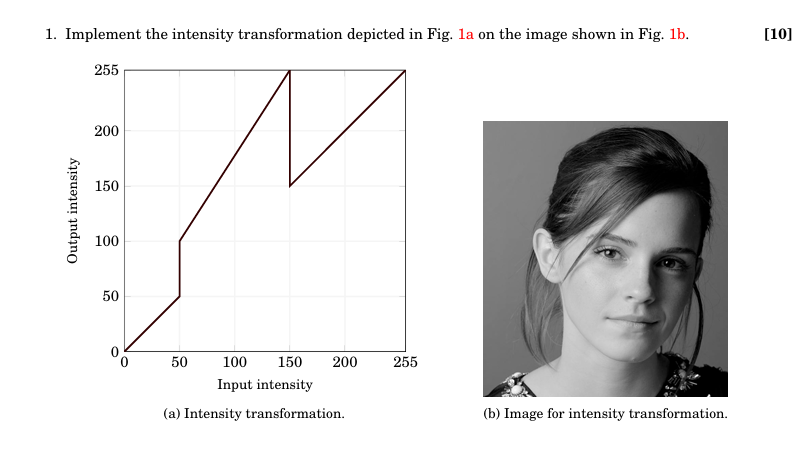

In [79]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [80]:
img1 = cv.imread("a1images/emma.jpg",cv.IMREAD_GRAYSCALE)
t1 = np.linspace(0, 50, 51, dtype=np.uint8)
t2 = np.linspace(100, 255, 150 - 51 + 1, dtype=np.uint8)
t3 = np.linspace(150, 255, 255 - 151 + 1, dtype=np.uint8)
#np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
#start: The beginning value of the sequence.
#stop: The end value of the sequence.
#num: How many samples to generate (default 50).
#endpoint: Whether to include the stop value (default True).
#retstep: If True, return the samples and the step size.
#dtype: Data type of the output array.

In [81]:
transform1 = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
img1_transformed = cv.LUT(img1,transform1)

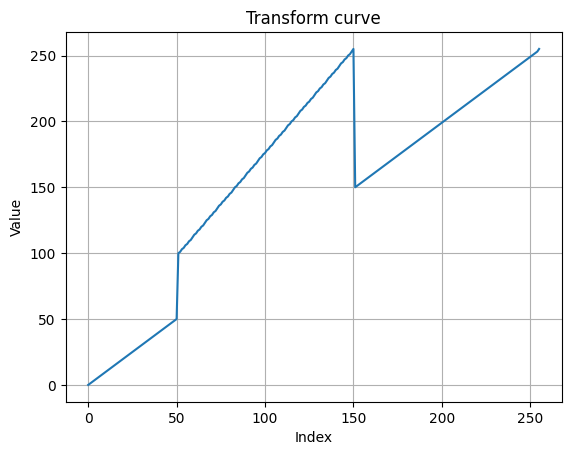

In [82]:
plt.plot(transform1)
plt.title("Transform curve")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

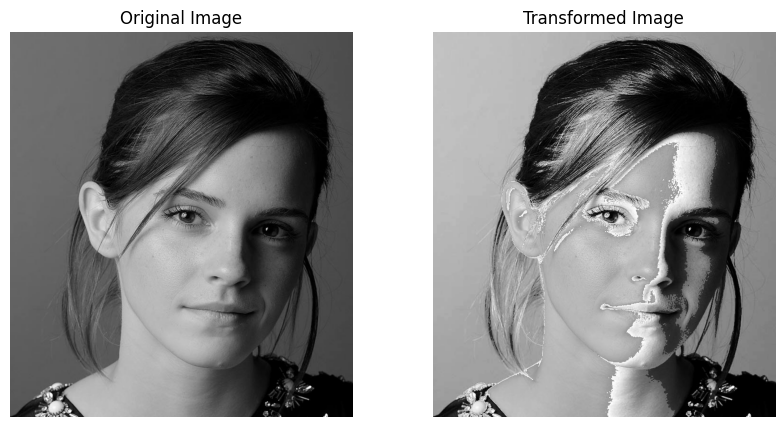

In [90]:
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.imshow(img1_rgb)  # Use cmap='gray' if image is grayscale
plt.axis('off')

# Plot transformed image
plt.subplot(1, 2, 2)
plt.title("Transformed Image")
img1_transformed_rgb = cv.cvtColor(img1_transformed, cv.COLOR_BGR2RGB)
plt.imshow(img1_transformed_rgb)
plt.axis('off')

plt.show()

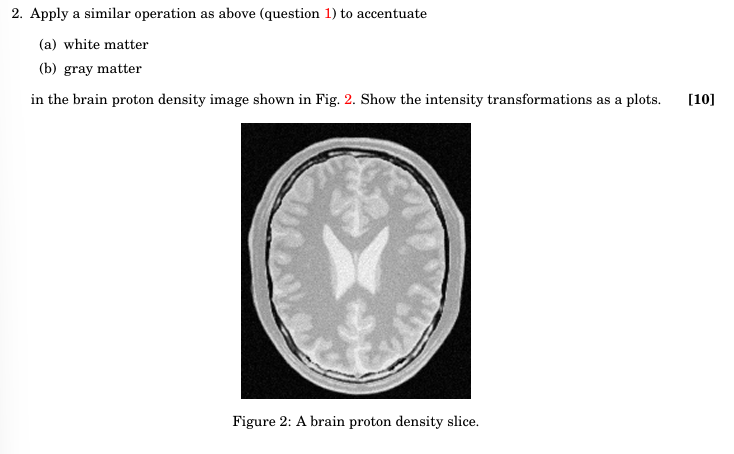

In [84]:
img2 = cv.imread("a1images/brain_proton_density_slice.png")


In [85]:
lut_white= np.array([
    int(i * 0.4) if i < 180 else min(255, int(i * 1.3))
    for i in range(256)
], dtype=np.uint8)

lut_gray= np.array([
    int(i * 0.3) if (i < 80 or i > 160) else min(255, int(i * 1.5))
    for i in range(256)
], dtype=np.uint8)


In [86]:
white_matter = cv.LUT(img2,lut_white)
gray_matter = cv.LUT(img2,lut_gray)

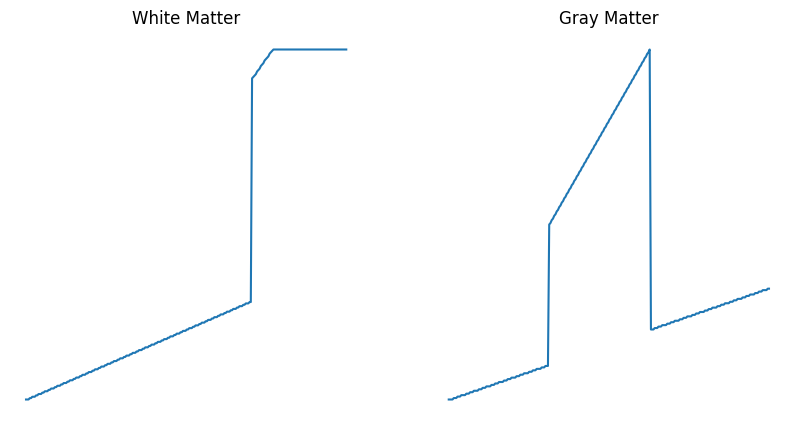

In [87]:
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.title("White Matter")
plt.plot(lut_white)  # Use cmap='gray' if image is grayscale
plt.axis('off')

# Plot transformed image
plt.subplot(1, 2, 2)
plt.title("Gray Matter")
plt.plot(lut_gray)
plt.axis('off')

plt.show()

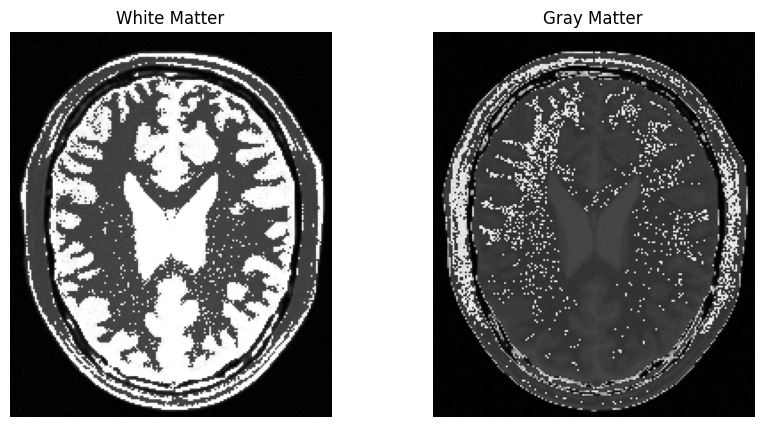

In [91]:
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.title("White Matter")
white_matter_rgb = cv.cvtColor(white_matter, cv.COLOR_BGR2RGB)
plt.imshow(white_matter_rgb)  # Use cmap='gray' if image is grayscale
plt.axis('off')

# Plot transformed image
plt.subplot(1, 2, 2)
plt.title("Gray Matter")
gray_matter_rgb = cv.cvtColor(gray_matter, cv.COLOR_BGR2RGB)
plt.imshow(gray_matter_rgb)
plt.axis('off')

plt.show()

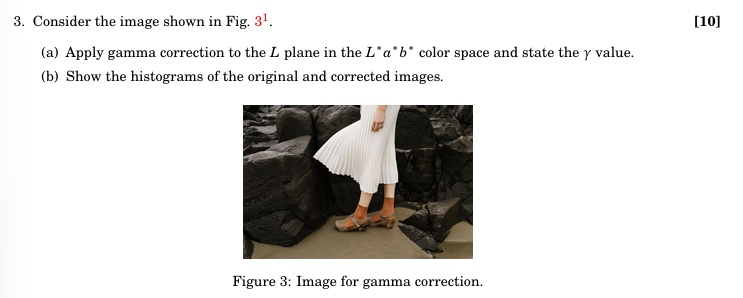

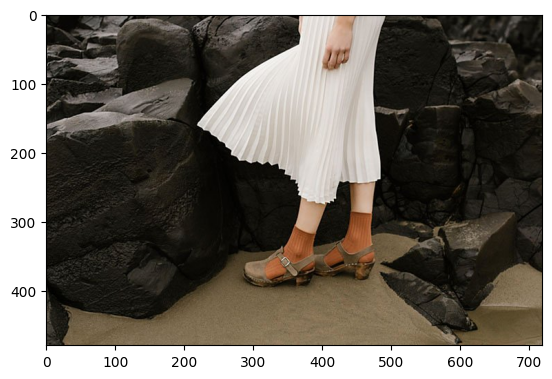

In [92]:
img3 = cv.imread("a1images/highlights_and_shadows.jpg")
img3_rgb = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.imshow(img3_rgb)

In [105]:
img_lab = cv.cvtColor(img3, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_lab)

L_norm = L / 255.0
gamma = 0.5

L_gamma = np.power(L_norm, gamma)
L_corrected = np.uint8(L_gamma * 255)
img_lab_corrected = cv.merge([L_corrected, a, b])
img_corrected = cv.cvtColor(img_lab_corrected, cv.COLOR_LAB2BGR)



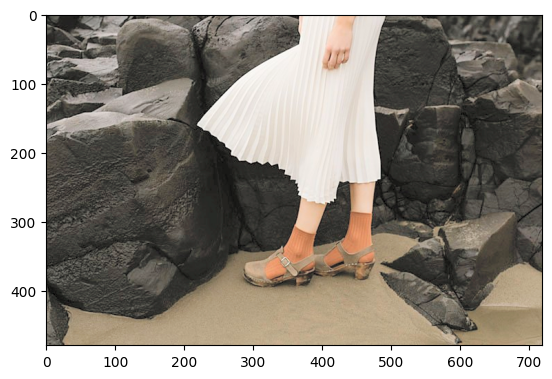

In [106]:
img3_corrected_rgb = cv.cvtColor(img_corrected,cv.COLOR_BGR2RGB)
plt.imshow(img3_corrected_rgb)

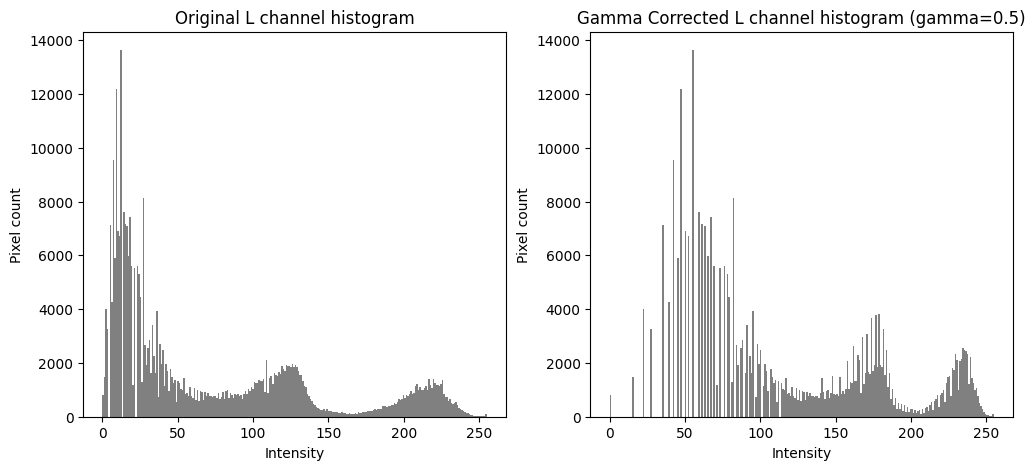

In [107]:
plt.figure(figsize=(12,5))

# Original L histogram
plt.subplot(1,2,1)
plt.hist(L.ravel(), bins=256, color='gray')
plt.title('Original L channel histogram')
plt.xlabel('Intensity')
plt.ylabel('Pixel count')

# Corrected L histogram
plt.subplot(1,2,2)
plt.hist(L_corrected.ravel(), bins=256, color='gray')
plt.title(f'Gamma Corrected L channel histogram (gamma={gamma})')
plt.xlabel('Intensity')
plt.ylabel('Pixel count')

plt.show()


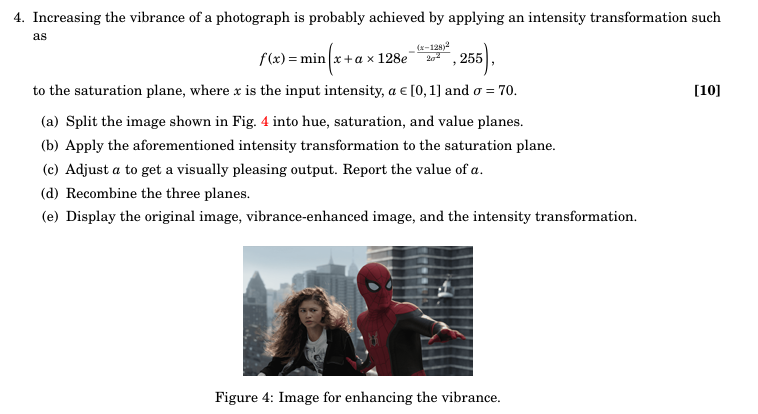